# Présentation des données

In [65]:
# Exo 1 - Préparation des données 

# importation des données
import pandas as pd 
import numpy as np 
# import du fichier
data = pd.read_csv("synthetic.csv")

# Visualisation des données
print(data.head())


      Attr_A     Attr_B       Attr_C      Attr_D      Attr_E       Attr_F  \
0  12.478064  14.784992  1247.541877  100.962061   52.462177  1089.398211   
1   8.264345   8.854181  1389.686814   99.526529   65.106526  1186.523399   
2   9.875571  13.292442   779.077401  123.993772  104.699796  1201.722480   
3   9.207661   9.346913   965.468523   89.176009  102.628284   743.913507   
4   8.863842  12.542969  1096.386230  106.595385  131.813380   883.059615   

      Attr_G     Attr_H     Attr_I      Attr_J       Attr_K     Attr_L  \
0  10.575834   8.375407  10.288159  110.746551   994.367610   9.069350   
1   9.500485  10.088058   9.371983   78.210274   943.089589   9.988919   
2   9.545266  14.266238   9.703551   86.252483  1082.989190  10.084217   
3   9.777953  11.613946   8.912059   96.727873   812.800511   8.621781   
4  10.092974  13.556029  11.649982   21.566576   971.083175  10.072271   

        Attr_M      Attr_N  Class  
0  1027.953917  109.672758      1  
1  1120.317724   83.

In [66]:
# 1 - Nombre de colonnes (attributs) dans le DataFrame
num_attributes = data.shape[1]

# Afficher le nombre d'attributs
print(f"Le nombre d'attributs dans le fichier est : {num_attributes}")


Le nombre d'attributs dans le fichier est : 15


In [67]:
# Type de données et valeurs manquantes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr_A  2298 non-null   float64
 1   Attr_B  2298 non-null   float64
 2   Attr_C  2298 non-null   float64
 3   Attr_D  2298 non-null   float64
 4   Attr_E  2298 non-null   float64
 5   Attr_F  2298 non-null   float64
 6   Attr_G  2298 non-null   float64
 7   Attr_H  2298 non-null   float64
 8   Attr_I  2298 non-null   float64
 9   Attr_J  2298 non-null   float64
 10  Attr_K  2298 non-null   float64
 11  Attr_L  2298 non-null   float64
 12  Attr_M  2298 non-null   float64
 13  Attr_N  2298 non-null   float64
 14  Class   2298 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 269.4 KB
None


In [68]:
# Avoir le nombre d'attributs dans le modèle
print(data.columns)
# 14 attributs dans le modèle

Index(['Attr_A', 'Attr_B', 'Attr_C', 'Attr_D', 'Attr_E', 'Attr_F', 'Attr_G',
       'Attr_H', 'Attr_I', 'Attr_J', 'Attr_K', 'Attr_L', 'Attr_M', 'Attr_N',
       'Class'],
      dtype='object')


In [69]:
# Obtenir les classes uniques dans la colonne 'Class'
classes_uniques = data['Class'].unique()

# Nombre de classes différentes
num_classes = len(classes_uniques)

# Afficher le nombre de classes différentes
print(f"Le nombre de classes différentes dans les données est : {num_classes}")

Le nombre de classes différentes dans les données est : 4


In [70]:
# combien d'instances compte chaque classe?
nbr_instances = data['Class'].value_counts()
print(nbr_instances)

# Sortie 
# Class
# 1    908
# 0    674
# 2    472
# 3    244
# Name: count, dtype: int64

Class
1    908
0    674
2    472
3    244
Name: count, dtype: int64


# Les données sont-elles linéairement séparables ?
Non, si on observe le schéma 1 on voit que les données ne le sont pas.
De plus si l'on choisit de les ranger par classe , on peut s'apercevoir que 


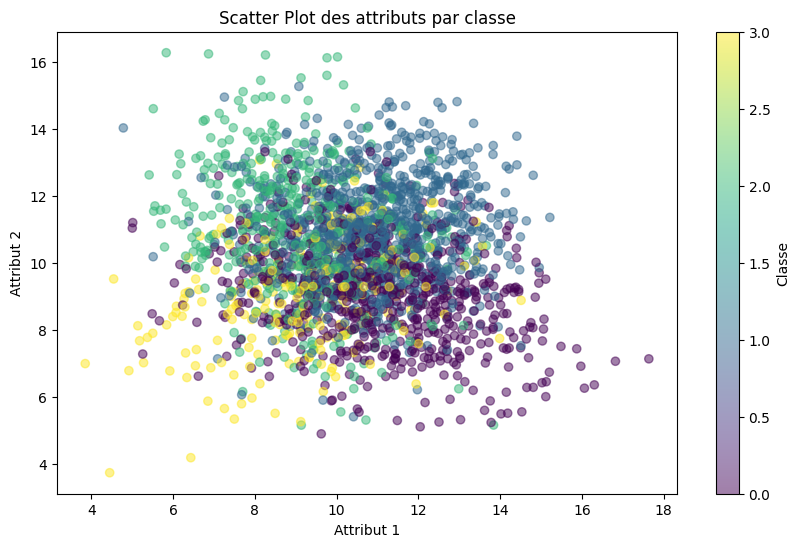

In [71]:
import matplotlib.pyplot as plt # import biblio matplot
plt.figure(figsize=(10, 6))
plt.scatter(data['Attr_A'], data['Attr_B'], c=data['Class'], alpha=0.5, cmap='viridis')
plt.xlabel('Attribut 1')
plt.ylabel('Attribut 2')
plt.title('Scatter Plot des attributs par classe')
plt.colorbar(label='Classe')
plt.show()

# On peut voir clairement que ce n'est pas divisible linéairement à l'état brut
# je pense que use image est vraiment mieux


## 5 et 6 (voir compte-rendu.md) 

# 2 Mise en oeuvre des modèles

In [72]:
# Choisir un attribut à analyser, par exemple 'Attr_A'
attribute = 'Attr_A'


# Calculer les quartiles pour l'attribut choisi
quartiles = data[attribute].quantile([0.25, 0.5, 0.75])

# Sort the attribute values and print them
sorted_attribute = data[attribute].sort_values()
print(sorted_attribute)
print(quartiles)
# Afficher les quartiles
print(f"Quartile 1 (Q1) de l'attribut '{attribute}': {quartiles[0.25]}")
print(f"Médiane (Q2) de l'attribut '{attribute}': {quartiles[0.5]}")
print(f"Quartile 3 (Q3) de l'attribut '{attribute}': {quartiles[0.75]}")


167      3.849151
273      4.447789
711      4.544928
245      4.781749
709      4.918297
          ...    
1863    15.973482
1415    16.060650
1324    16.302797
1906    16.818910
1766    17.636623
Name: Attr_A, Length: 2298, dtype: float64
0.25     9.099236
0.50    10.416503
0.75    11.729266
Name: Attr_A, dtype: float64
Quartile 1 (Q1) de l'attribut 'Attr_A': 9.099235683587334
Médiane (Q2) de l'attribut 'Attr_A': 10.41650269976578
Quartile 3 (Q3) de l'attribut 'Attr_A': 11.729265932954785


# 6 : 

# Partie 2 : Mise en oeuvre des modèles.

# Arbre de décision 


In [73]:
# Arbre de décision

# Calcul de l'entropie

"""
L'entropie est une mesure de l'incertitude associée à une variable aléatoire.
"""

def entropie(dataframe , attribut_cible):  
    # Calcul de la probabilité de chaque classe
    compte_classe = dataframe[attribut_cible].value_counts()
    #print(compte_classe)
    proba = compte_classe / compte_classe.sum()
    #print(proba) 
    # Calcul de l'entropie
    entropie = - (proba * np.log2(proba+ np.finfo(float).eps)).sum() # éviter log2(0)
    return entropie

# Test de la fonction
print(entropie(data, 'Attr_A'))


11.166163082645376


11.166163082646115
11.166163082645376

11.166163082646115
11.166163082645376

11.166163082646115
11.166163082645376

1.8608867211835993
1.860886721183598

In [74]:
import pandas as pd
import numpy as np

# Fonction pour calculer tous les quartiles d'un attribut donné
def calculate_quartiles(data, attribute):
    return data[attribute].quantile([0.25, 0.5, 0.75])

# Test de la fonction sur le DataFrame chargé

print(calculate_quartiles(data, 'Attr_A'))


0.25     9.099236
0.50    10.416503
0.75    11.729266
Name: Attr_A, dtype: float64


In [75]:
data

,Attr_A,Attr_B,Attr_C,Attr_D,Attr_E,Attr_F,Attr_G,Attr_H,Attr_I,Attr_J,Attr_K,Attr_L,Attr_M,Attr_N,Class
0,12.478064,14.784992,1247.541877,100.962061,52.462177,1089.398211,10.575834,8.375407,10.288159,110.746551,994.367610,9.069350,1027.953917,109.672758,1
1,8.264345,8.854181,1389.686814,99.526529,65.106526,1186.523399,9.500485,10.088058,9.371983,78.210274,943.089589,9.988919,1120.317724,83.498764,3
2,9.875571,13.292442,779.077401,123.993772,104.699796,1201.722480,9.545266,14.266238,9.703551,86.252483,1082.989190,10.084217,970.953682,93.557046,2
3,9.207661,9.346913,965.468523,89.176009,102.628284,743.913507,9.777953,11.613946,8.912059,96.727873,812.800511,8.621781,947.207195,120.890054,3
4,8.863842,12.542969,1096.386230,106.595385,131.813380,883.059615,10.092974,13.556029,11.649982,21.566576,971.083175,10.072271,1007.583900,149.511979,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2293,8.537905,9.384823,1327.744849,105.043442,109.078735,1160.837366,10.054976,6.461691,9.718114,146.371553,1057.578998,9.504676,896.830168,50.119576,1
2294,10.727881,12.758686,1017.495424,103.388471,65.953337,955.265960,11.040854,5.930806,9.690326,92.318732,960.311986,9.262439,1158.151512,110.854719,1
2295,9.501612,12.449207,934.067397,94.681564,108.414931,1097.411669,11.379111,12.178924,9.161475,63.980205,972.994510,7.685836,996.569164,89.850887,0
2296,11.581467,12.024253,1247.894013,95.732086,85.265126,1012.536672,9.972115,9.001799,11.909924,128.966934,927.437658,8.906923,891.006210,93.561794,1


In [76]:
data.sort_values(by="Attr_C")

,Attr_A,Attr_B,Attr_C,Attr_D,Attr_E,Attr_F,Attr_G,Attr_H,Attr_I,Attr_J,Attr_K,Attr_L,Attr_M,Attr_N,Class
714,12.101593,8.776871,409.401682,113.507701,130.167165,909.720688,9.630775,12.659269,6.092804,79.475117,1095.086096,10.349793,827.274051,102.728955,2
367,10.687974,9.603299,564.726764,109.831371,111.628640,953.155152,9.839546,12.512257,7.382766,103.830816,886.562840,9.250870,822.515526,109.185262,2
1268,12.015272,10.368326,581.097467,99.970186,87.668558,883.580177,10.177328,9.315352,9.281240,82.190733,1061.152167,11.230545,999.565151,131.920718,1
778,14.955371,9.856543,587.449314,84.337346,67.727387,1115.362534,10.370170,13.461490,8.241307,60.873877,1051.207482,10.426443,950.694750,123.978272,1
747,11.287288,8.809182,599.779072,100.921213,132.623713,1067.086185,11.532533,13.264854,10.691771,72.834025,818.957712,8.640934,904.976128,101.711925,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,12.611922,9.192021,1577.536407,89.312730,128.772804,612.147859,9.651594,10.186476,10.806673,108.183728,986.108286,11.072709,1002.070868,71.524133,0
500,8.831290,10.182347,1596.915404,104.452109,100.251609,633.843756,10.667536,10.470698,8.014120,88.857743,1066.118099,9.728661,883.718300,69.448180,0
1046,11.803491,12.181624,1602.812555,84.409037,82.787241,1154.006938,9.510960,9.114558,12.565027,144.911439,992.030870,10.960593,1181.004510,52.853987,1
131,15.072137,8.314598,1618.355671,124.449813,137.511260,899.252507,9.647345,7.522779,11.770009,104.085359,956.628709,9.228771,1105.490072,96.339271,0


In [77]:
# data.head()
sorted = data.sort_values(by="Attr_A")
print(len(sorted))

2298


In [78]:
def gain_information(dataframe, attribut_cible, attribut_test):
    """
    Calculate the information gain from splitting the data based on a test attribute.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data to partition.
    attribut_cible (str): The target attribute we want to predict.
    attribut_test (str): The attribute whose gain we want to calculate.

    Returns:
    tuple: A tuple containing:
        - attribut_test (str): The test attribute.
        - max_gain (float): The maximum information gain obtained.
        - best_split_value (float): The split value that provides the best gain.
        - best_partitions (tuple): A tuple containing two DataFrames representing the lower and upper partitions
          resulting from the best split.
    """
    
    # Initial entropy of the target attribute
    entropie_initiale = entropie(dataframe, attribut_cible)

    # The gain, split_value and partitions initialized
    max_gain = 0
    best_split_value = None
    best_partitions = None

    # Check for no unique values in the attribute being tested
    if len(dataframe[attribut_test].unique()) <= 1:
        return None

    # Sorting data by the attribute to test
    sorted_data = dataframe.sort_values(by=attribut_test)

    # Unique values of the attribute to test, considering quartiles to reduce complexity
    quartiles = calculate_quartiles(sorted_data, attribut_test).to_list()

    # Adding the min and max values to cover the entire range of the attribute
    quartiles = [sorted_data[attribut_test].min()] + quartiles + \
        [sorted_data[attribut_test].max()]
    # Voir si je n'enlève pas min et max valeur

    # Iterating through the sorted unique values to find the best split
    for split_value in quartiles:
        # Partitioning the data based on the split value
        lower_partition = sorted_data[sorted_data[attribut_test] < split_value]
        upper_partition = sorted_data[sorted_data[attribut_test]
                                      >= split_value]

        # Calculating the weighted entropy for the partitions
        # Row counts.
        total_instances = len(sorted_data)
        lower_weight = len(lower_partition) / total_instances
        upper_weight = len(upper_partition) / total_instances

        # Computing the weighted_entropy
        weighted_entropy = (lower_weight * entropie(lower_partition, attribut_cible)) + \
                           (upper_weight * entropie(upper_partition, attribut_cible))

        # Information gain for the current split
        current_gain = entropie_initiale - weighted_entropy

        # If the current gain is greater than the max_gain, update max_gain and best_split_value
        if current_gain > max_gain:
            max_gain = current_gain
            best_split_value = split_value
            best_partitions = (lower_partition, upper_partition)

    # Returning the attribute, gain, split_value, and partitions as a tuple
    return attribut_test, max_gain, best_split_value, best_partitions


# Testing the function with an example attribute
# Let's use 'Attr_A' as the attribute to test and 'Class' as the target
test_gain_info = gain_information(data, 'Class', 'Attr_H')
test_gain_info

('Attr_H',
 0.13650018458513413,
 10.193379573020025,
 (         Attr_A     Attr_B       Attr_C      Attr_D      Attr_E       Attr_F  \
  1121   6.377450  11.228294   886.426642  104.982647  109.170561   684.266146   
  245    4.781749  14.022814  1185.219922  120.079881  134.873534  1019.790528   
  715    8.782567   9.683032  1268.478960   88.060288   85.606156   897.779906   
  12     8.390581  12.352995  1012.305252   96.187491  111.643709   972.983129   
  773    9.526369  14.308478  1219.807051  112.871810   58.286968   861.457110   
  ...         ...        ...          ...         ...         ...          ...   
  1099   6.920209  13.730635  1131.588009   99.176107  107.291776   965.230881   
  631   12.531046   7.211853  1172.063524  100.153066  136.905073   760.395873   
  1713  12.611922   9.192021  1577.536407   89.312730  128.772804   612.147859   
  1435  11.582174   9.974185  1165.170936  103.687963   77.781597  1239.079486   
  1653  11.835193  10.565540  1096.681067  1

In [79]:
def find_best_gain(dataframe, attribut_cible):
    """
    Calculate the best information gain and corresponding split in a DataFrame.
    
    Parameters:
    dataframe (pd.DataFrame): The input data as a pandas DataFrame.
    attribut_cible (str): The target attribute that we want to predict (e.g. 'Class').
    
    Returns:
    tuple: A tuple containing the following elements:
        - best_attribute (str): The attribute that yields the best information gain.
        - best_gain (float): The highest information gain observed.
        - best_split_value (float): The split value that produces the best gain.
        - best_partitions (tuple): A tuple containing the two partitions resulting from the best split.
    """
    # Initialize variables to track the best gain and the associated attribute
    best_gain = 0
    best_attribute = None
    best_split_value = None
    best_partitions = None

    # Iterate over all the attributes in the DataFrame, except the target attribute
    for test_attribute in dataframe.columns:
        if test_attribute == attribut_cible:
            continue  # Skip the target attribute

        # Calculate the information gain for the current attribute
        result = gain_information(dataframe, attribut_cible, test_attribute)

        # If the result is None, skip to the next attribute
        if result is None:
            continue

        # Unpack the result from gain_information
        _, current_gain, split_value, partitions = result

        # Update the variables if the current gain is higher than the best gain
        if current_gain > best_gain:
            best_gain = current_gain
            best_attribute = test_attribute
            best_split_value = split_value
            best_partitions = partitions

    # Return the best attribute, gain, split value, and partitions
    return best_attribute, best_gain, best_split_value, best_partitions


find_best_gain(data, 'Class')

('Attr_B',
 0.16161530810503888,
 10.21752558689527,
 (         Attr_A     Attr_B       Attr_C      Attr_D      Attr_E       Attr_F  \
  273    4.447789   3.730068  1441.764461  103.087628   93.033002  1226.579557   
  1379   6.432373   4.179097  1097.997564  103.898655  102.736818  1227.495298   
  517    9.623709   4.890602  1183.400895   84.259670   32.280760  1404.745473   
  234   12.043613   5.101339  1111.428994   92.087728  156.996248   383.834504   
  1847   9.134969   5.150550   741.096047  100.222235  104.891824  1486.199645   
  ...         ...        ...          ...         ...         ...          ...   
  2114   9.316781  10.207037  1172.436436  103.743131  111.505843   832.000760   
  1555  10.702895  10.207950  1251.929234  104.743911  113.298776   694.555777   
  544   10.055226  10.214928   656.988813  101.234959  132.003972  1156.564477   
  438   10.517983  10.216457  1539.040210   87.369243  117.599548   409.537411   
  271   13.156288  10.217217   710.274855  10

In [80]:
from sklearn.model_selection import train_test_split

def split_data(dataframe, attribut_cible, test_size=0.2, random_state=42):
    """
    Splits the dataframe into training and testing sets.

    Parameters:
    dataframe (pd.DataFrame): The DataFrame containing the data to split.
    attribut_cible (str): The target attribute we want to predict. e.g ("Class")
    test_size (float): The proportion of the data to include in the test split. Default is 0.2.
    random_state (int): Controls the shuffling applied to the data before applying the split. Default is 42.

    Returns:
    tuple: A tuple containing:
        - X_train (pd.DataFrame): The training features.
        - X_test (pd.DataFrame): The testing features.
        - y_train (pd.Series): The training target attribute.
        - y_test (pd.Series): The testing target attribute.
    """
    # Separate features and target attribute
    X = dataframe.drop(columns=[attribut_cible])
    y = dataframe[attribut_cible]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test =  split_data(data, "Class")

In [81]:
class DecisionNode:
    def __init__(
            self,
            is_leaf,
            attribute=None,
            split_value=None,
            left=None,
            right=None,
            prediction=None):
        """
        Initialize a decision tree node.

        Parameters:
        is_leaf (bool): Whether the node is a leaf node.
        attribute (str, optional): The attribute to split on if the node is not a leaf.
        split_value (float, optional): The split value for the attribute if the node is not a leaf.
        left (DecisionNode, optional): The left child node.
        right (DecisionNode, optional): The right child node.
        value (object, optional): The target value if the node is a leaf.
        """
        self.is_leaf = is_leaf
        self.attribute = attribute
        self.split_value = split_value
        self.left = left
        self.right = right
        self.prediction = prediction

    def _is_leaf(self):
        return self.is_leaf

In [82]:
class DecisionTree:
    """
    Represents a decision tree.

    Attributes:
    max_depth (int): The maximum depth of the tree.
    tree (DecisionNode): The root node of the tree.
    """

    def __init__(self, max_depth=8):
        """
        Initialize the decision tree.

        Parameters:
        max_depth (int, optional): The maximum depth of the tree. Default is 8.
        """
        self.max_depth = max_depth
        self.tree = None

    def _build_tree(self, data, target_attribute, depth=0):
        """
        Recursively build the decision tree.

        Parameters:
        data (pd.DataFrame): The input data as a pandas DataFrame.
        target_attribute (str): The target attribute that we want to predict.
        depth (int): The current depth of the tree.

        Returns:
        DecisionNode: The root node of the decision tree.
        """
        # Check stopping conditions: maximum depth or pure leaf
        if depth >= self.max_depth:
            # Return a leaf node with the most frequent target value
            prediction = data[target_attribute].mode()[0]
            return DecisionNode(is_leaf=True, prediction=prediction)

        # Check if the data is pure (all target values are the same)
        if data[target_attribute].nunique() == 1:
            # Return a leaf node with the unique target value
            prediction = data[target_attribute].iloc[0]
            return DecisionNode(is_leaf=True, prediction=prediction)

        # Find the best attribute, gain, split value, and partitions using find_best_gain
        best_attribute, best_gain, best_split_value, best_partitions = find_best_gain(
            data, target_attribute)

        # Check if no gain is found, return the most frequent target value as a leaf node
        if best_attribute is None or best_gain <= 0:
            prediction = data[target_attribute].mode()[0]
            return DecisionNode(is_leaf=True, prediction=prediction)

        # Create the decision node with the best attribute and split value
        left_data, right_data = best_partitions
        left_child = self._build_tree(left_data, target_attribute, depth + 1)
        right_child = self._build_tree(right_data, target_attribute, depth + 1)

        # Return the decision node with the children
        return DecisionNode(
            is_leaf=False,
            attribute=best_attribute,
            split_value=best_split_value,
            left=left_child,
            right=right_child
        )

    def fit(self, data, target_attribute):
        """
        Build the decision tree based on the provided data and target attribute. e.g ("Class")
        Parameters:
        data (pd.DataFrame): The input data as a pandas DataFrame.
        target_attribute (str): The target attribute that we want to predict.
        """
        self.tree = self._build_tree(data, target_attribute)

    def train(self, dataframe, target_attribute):
        """
        Train the decision tree using the given data.

        Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the training data.
        target_attribute (str): The target attribute we want to predict.
        """
        self.fit(dataframe, target_attribute)

    def predict(self, data):
        """
        Predict target attribute values for the given data using the decision tree.

        Parameters:
        data (pd.DataFrame): The data for which predictions are to be made.

        Returns:
        np.array: The predicted values of the target attribute.
        """
        predictions = data.apply(self._predict_single, axis=1)
        return predictions

    def _predict_single(self, row):
        """
        Predict the target attribute value for a single data point.

        Parameters:
        row (pd.Series): The data point as a pandas Series.

        Returns:
        object: The predicted value of the target attribute.
        """
        node = self.tree

        # Traverse the tree until a leaf node is reached
        while not node.is_leaf:
            attribute = node.attribute
            split_value = node.split_value

            if row[attribute] < split_value:
                node = node.left
            else:
                node = node.right

        # Return the value of the leaf node
        return node.prediction

    def print_tree(self, node=None, indent=""):
        """
        Print the decision tree in a human-readable way.

        Parameters:
        node (DecisionNode, optional): The current node to print. If not specified, starts with the root node.
        indent (str): Indentation for nested levels in the tree.
        """
        # If no node is specified, start with the root node
        if node is None:
            node = self.tree

        # Check if the current node is a leaf node
        if node._is_leaf():
            print(f"{indent}Leaf: Predict {node.prediction}")
        else:
            # Print the split condition and value at the current node
            print(f"{indent}Node: {node.attribute} < {node.split_value}")

            # Recursively print the left and right children
            print(f"{indent}Left:")
            self.print_tree(node.left, indent + "    ")

            print(f"{indent}Right:")
            self.print_tree(node.right, indent + "    ")

## Class qui permet d'évaluer notre model.

In [83]:
class EvaluationMetrics:
    """
    Classe pour calculer les métriques d'évaluation.
    """
    @staticmethod
    def accuracy_score(y_true, y_pred):
        """
        Calcule l'exactitude entre les valeurs réelles et prédites.
        
        Arguments:
        y_true -- Les valeurs réelles (cibles).
        y_pred -- Les valeurs prédites par le modèle.
        
        Retourne:
        float -- L'exactitude.
        """
        correct_predictions = sum(y_true == y_pred)
        total_predictions = len(y_true)
        return correct_predictions / total_predictions

    @staticmethod
    def precision_score(y_true, y_pred, positive_label):
        """
        Calcule la précision pour une classe positive spécifiée.
        
        Arguments:
        y_true -- Les valeurs réelles (cibles).
        y_pred -- Les valeurs prédites par le modèle.
        positive_label -- La classe positive pour laquelle calculer la précision.
        
        Retourne:
        float -- La précision.
        """
        true_positives = sum((y_true == positive_label) & (y_pred == positive_label))
        predicted_positives = sum(y_pred == positive_label)
        if predicted_positives == 0:
            return 0.0
        return true_positives / predicted_positives

    @staticmethod
    def recall_score(y_true, y_pred, positive_label):
        """
        Calcule le rappel pour une classe positive spécifiée.
        
        Arguments:
        y_true -- Les valeurs réelles (cibles).
        y_pred -- Les valeurs prédites par le modèle.
        positive_label -- La classe positive pour laquelle calculer le rappel.
        
        Retourne:
        float -- Le rappel.
        """
        true_positives = sum((y_true == positive_label) & (y_pred == positive_label))
        actual_positives = sum(y_true == positive_label)
        if actual_positives == 0:
            return 0.0
        return true_positives / actual_positives

    @staticmethod
    def f1_score(y_true, y_pred, positive_label):
        """
        Calcule le score F1 pour une classe positive spécifiée.
        
        Arguments:
        y_true -- Les valeurs réelles (cibles).
        y_pred -- Les valeurs prédites par le modèle.
        positive_label -- La classe positive pour laquelle calculer le score F1.
        
        Retourne:
        float -- Le score F1.
        """
        precision = EvaluationMetrics.precision_score(y_true, y_pred, positive_label)
        recall = EvaluationMetrics.recall_score(y_true, y_pred, positive_label)
        
        if precision == 0 and recall == 0:
            return 0.0
        
        return 2 * (precision * recall) / (precision + recall)


In [84]:
def train_and_evaluate_decision_trees(X_train, y_train, X_test, y_test, depths):
    """
    Train decision tree models with different maximum depths and evaluate their performance.

    Args:
        X_train: Training features (data).
        y_train: Training target (labels).
        X_test: Testing features (data).
        y_test: Testing target (labels).
        depths (list): List of maximum depths to test for decision trees.

    Returns:
        List of tuples containing the accuracy scores and corresponding models.
        The list is sorted in descending order based on accuracy scores.
    """
    # Combine features and labels for training and testing sets
    train_data = pd.concat([X_train, y_train], axis=1)
    test_data = pd.concat([X_test, y_test], axis=1)

    # List to store the models and their accuracy scores
    models_and_scores = []

    # Train and evaluate models with different maximum depths
    for max_depth in depths:
        # Create a decision tree classifier with the specified maximum depth
        model = DecisionTree(max_depth=max_depth)
        
        # Train the model on the combined training set
        model.train(train_data, y_train.name)  # Pass the name of the target attribute
        
        # Predict on the combined test set
        y_pred = model.predict(test_data)
        
        # Calculate the accuracy of the model using the provided y_test
        accuracy = EvaluationMetrics.accuracy_score(y_test, y_pred)
        
        # Append the accuracy score and model to the list
        models_and_scores.append((accuracy, model))
        
        # Print the results for the current model
        print(f"Max Depth: {max_depth}, Accuracy: {accuracy:.4f}")
    
    # Sort the list of models and scores in descending order based on accuracy
    models_and_scores.sort(key=lambda x: x[0], reverse=True)
    
    return models_and_scores

In [85]:
target_attribute  = "Class"
X_train, X_test, y_train, y_test = split_data(data, target_attribute)
models_and_scores = train_and_evaluate_decision_trees(X_train, y_train, X_test, y_test, [3, 4, 5, 6, 7, 8])
print(models_and_scores)

Max Depth: 3, Accuracy: 0.6478
Max Depth: 4, Accuracy: 0.7174
Max Depth: 5, Accuracy: 0.7435
Max Depth: 6, Accuracy: 0.7783
Max Depth: 7, Accuracy: 0.7870
Max Depth: 8, Accuracy: 0.8022
[(0.8021739130434783, <__main__.DecisionTree object at 0x74490f6aff70>), (0.7869565217391304, <__main__.DecisionTree object at 0x74490f8511b0>), (0.7782608695652173, <__main__.DecisionTree object at 0x74490f8a3eb0>), (0.7434782608695653, <__main__.DecisionTree object at 0x74490f851150>), (0.717391304347826, <__main__.DecisionTree object at 0x74490f6aead0>), (0.6478260869565218, <__main__.DecisionTree object at 0x74490f867df0>)]


## Two best models

In [86]:
best_model = models_and_scores[0]
second_best_model = models_and_scores[1]

print("Best model", best_model)
print("Second Best model", second_best_model)

Best model (0.8021739130434783, <__main__.DecisionTree object at 0x74490f6aff70>)
Second Best model (0.7869565217391304, <__main__.DecisionTree object at 0x74490f8511b0>)


## Test of DecisionNode and DecisionTree class

In [87]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the target attribute
target_attribute = "Class"

# Split the data into training and testing sets using the split_data function
X_train, X_test, y_train, y_test = split_data(data, target_attribute)

# Instantiate the DecisionTree class
decision_tree = DecisionTree(max_depth=8)
evaluation_metric = EvaluationMetrics()

# Train the decision tree using the training data
decision_tree.train(pd.concat([X_train, y_train], axis=1), target_attribute)

# Predict the target attribute for the testing data
predictions = decision_tree.predict(pd.concat([X_test, y_test], axis=1))

# Evaluate the model using accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, predictions)
eval_accuracy = evaluation_metric.accuracy_score(y_test, predictions)

precision = precision_score(y_test, predictions, average='weighted')
eval_precision = evaluation_metric.precision_score(y_test, predictions, positive_label=1)

recall = recall_score(y_test, predictions, average='weighted')
eval_recall = evaluation_metric.recall_score(y_test, predictions, positive_label=1)

f1 = f1_score(y_test, predictions, average='weighted')
eval_f1 = evaluation_metric.f1_score(y_test, predictions, positive_label=1)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Eval Accuracy: {eval_accuracy:.2f}")

print(f"Precision: {precision:.2f}")
print(f"Eval Precision: {eval_precision:.2f}")

print(f"Recall: {recall:.2f}")
print(f"Eval Recall: {eval_recall:.2f}")

print(f"F1-score: {f1:.2f}")
print(f"Eval F1-score: {eval_f1:.2f}")

decision_tree.print_tree()


Accuracy: 0.80
Eval Accuracy: 0.80
Precision: 0.80
Eval Precision: 0.82
Recall: 0.80
Eval Recall: 0.88
F1-score: 0.80
Eval F1-score: 0.85
Node: Attr_B < 10.29191435571561
Left:
    Node: Attr_I < 9.669387503046185
    Left:
        Node: Attr_C < 1010.4691978421824
        Left:
            Node: Attr_F < 1063.5927622234217
            Left:
                Node: Attr_C < 813.147663769757
                Left:
                    Node: Attr_F < 909.720687854177
                    Left:
                        Node: Attr_D < 108.10334628457446
                        Left:
                            Leaf: Predict 0
                        Right:
                            Leaf: Predict 2
                    Right:
                        Node: Attr_E < 105.41257888611317
                        Left:
                            Node: Attr_G < 10.342870496493784
                            Left:
                                Leaf: Predict 2
                            Right:
       

# 2.2 Réseaux de neurones artificiels

### 1 - Division des données.

In [88]:
from sklearn.model_selection import train_test_split


def neural_split_data(data, target_attribute):
    # Divisez les données en jeu d'entraînement et de test (85% et 15%)
    train_data, test_data = train_test_split(
        data, test_size=0.15, random_state=42)

    # Divisez le jeu d'entraînement en sous-ensemble d'entraînement et de validation (85% et 15%)
    train_data, val_data = train_test_split(
        train_data, test_size=0.15/0.85, random_state=42)

    # Séparez les données et les labels
    X_train, y_train = train_data.drop(
        columns=[target_attribute]), train_data[target_attribute]
    X_val, y_val = val_data.drop(
        columns=[target_attribute]), val_data[target_attribute]
    X_test, y_test = test_data.drop(
        columns=[target_attribute]), test_data[target_attribute]

    return X_train, y_train, X_val, y_val, X_test, y_test

### 2 - Création de la classe "NeuralNetwork"

In [96]:
import numpy as np


class NeuralNetwork:
    def __init__(self, architecture, activation='relu'):
        """
        Initialize the neural network with a specific architecture and activation function.

        Parameters:
        - architecture (list of int): List of integers representing the number of neurons in each layer.
        - activation (str): The activation function to use ('relu' or 'softmax').
        """
        self.architecture = architecture
        self.activation = activation

        # Initialize weights and biases
        self.weights = []
        self.biases = []
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Initialize weights and biases for the network layers.
        """
        np.random.seed(42)
        layer_sizes = self.architecture

        for i in range(1, len(layer_sizes)):
            weight_matrix = np.random.randn(
                layer_sizes[i], layer_sizes[i - 1]) * 0.01
            bias_vector = np.zeros((layer_sizes[i], 1))

            self.weights.append(weight_matrix)
            self.biases.append(bias_vector)
            # print(f"Dimensions de la matrice de poids {i}: {weight_matrix.shape}")
            # print(bias_vector.shape)

    def activation_function(self, x, layer_index=None):
        """
        Apply the specified activation function.

        Parameters:
        - x (np.array): Input array.

        Returns:
        - np.array: Output array with activation applied.
        """
        if layer_index == len(self.architecture) - 2:
            # Use softmax for the last hidden layer for classification
            exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
            return exp_x / np.sum(exp_x, axis=0, keepdims=True)
        elif self.activation == 'tanh':
            return np.tanh(x)
        elif self.activation == 'relu':
            return np.maximum(0, x)
        else:
            raise ValueError(
                "Invalid activation function. Use 'tanh' or 'relu'.")

    def activation_derivative(self, x):
        """
        Compute the derivative of the specified activation function.

        Parameters:
        - x (np.array): Input array.

        Returns:
        - np.array: Derivative of the activation function.
        """
        if self.activation == 'tanh':
            return 1 - np.tanh(x)**2
        elif self.activation == 'relu':
            return (x > 0).astype(float)
        else:
            raise ValueError(
                "Invalid activation function. Use 'tanh' or 'relu'.")

    def forward_propagation(self, X):
        """
        Perform forward propagation.

        Parameters:
        - X (np.array): Input data.

        Returns:
        - List of activations and z-values at each layer.
        """
        activations = [X.T]
        # print(activations)
        # print(activations)
        zs = []

        for i in range(len(self.architecture) - 1):
            # print(f"{self.weights[i].shape} * {activations[-1].shape} + {self.biases[i].shape}")
            z = np.dot(self.weights[i], activations[-1]) + self.biases[i]
            zs.append(z)
            activation = self.activation_function(z, i)
            activations.append(activation)

            # print("Forme de z : ", z.shape)
        return activations, zs

    def backward_propagation(self, activations, zs, y):
        """
        Perform backward propagation and calculate gradients.

        Parameters:
        - activations (list of np.array): List of activations at each layer.
        - zs (list of np.array): List of z-values at each layer.
        - y (np.array): True labels.

        Returns:
        - Tuple containing gradients of weights and biases.
        """
        m = y.shape[1]
        dw = []
        db = []

        # Compute the gradient of the last layer
        # Difference between predicted and actual labels
        dz = activations[-1] - y

        # Backpropagate the gradients
        for i in range(len(self.architecture) - 1, 0, -1):
            dw_i = np.dot(dz, activations[i - 1].T) / m
            db_i = np.sum(dz, axis=1, keepdims=True) / m

            dw.append(dw_i)
            db.append(db_i)

            if i > 1:
                dz = np.dot(self.weights[i - 1].T, dz) * \
                    self.activation_derivative(zs[i - 2])

        # Reverse gradients to match the order of weights and biases
        return dw[::-1], db[::-1]

    def update_parameters(self, dw, db, learning_rate):
        """
        Update the network parameters (weights and biases) using the given gradients.

        Parameters:
        - dw (list of np.array): Gradients of weights.
        - db (list of np.array): Gradients of biases.
        - learning_rate (float): Learning rate for the update.
        """
        for i in range(len(self.weights)):
            self.weights[i] -= learning_rate * dw[i]
            self.biases[i] -= learning_rate * db[i]

    def _shuffle_data(self, X_train, y_train):
        N, _ = X_train.shape
        shuffled_idx = np.random.permutation(N)
        return X_train.iloc[shuffled_idx], y_train.iloc[shuffled_idx]

    def train(self, X_train, y_train, X_val, y_val, learning_rate=0.01, epochs=100, patience=4, batch_size=4):
        """
        Train the network using the given data.

        Parameters:
        - X_train (np.array): Training data.
        - y_train (np.array): Training labels.
        - X_val (np.array): Validation data.
        - y_val (np.array): Validation labels.
        - learning rate (float): Learning rate for training.
        - epochs (int): Number of epochs to train for.
        - patience (int): Patience for early stopping.
        - batch_size (int): Size of mini-batch for training.
        """
        best_val_loss = float('inf')
        patience_counter = 0
        N, D = X_train.shape
        # print(f"X_train.shape = {X_train.shape}")

                # Lists to store losses at each epoch
        train_losses = []
        val_losses = []

        # print(X_train.shape)
        # Training loop
        for epoch in range(epochs):
            # Shuffle the training data
            X_train_shuffled, y_train_shuffled = self._shuffle_data(
                X_train, y_train)

            # Mini-batch training
            num_batches = N // batch_size
            # print(f"num_batches {num_batches}")
            for batch_idx in range(num_batches):
                # Récupérez le mini-lot
                start = batch_idx * batch_size
                end = start + batch_size

                # Utilisez X_train_shuffled[start:end] pour obtenir le mini-lot
                X_batch = X_train_shuffled[start:end]

                # Transposez X_batch pour avoir les dimensions (14, batch_size)
                X_batch = np.array(X_batch)

                # Utilisez y_train_shuffled[start:end] pour obtenir les étiquettes du mini-lot
                y_batch = y_train_shuffled[start:end]
                y_batch = np.array(y_batch)
                y_batch = np.eye(4)[y_batch]
                # y_batch = y_batch.reshape((4, 1))

                # print(f"X_bath = {X_batch.shape}")
                # print(f"Y_batch = {y_batch.shape}")

                # Effectuez la propagation avant
                activations, zs = self.forward_propagation(X_batch)

                # Effectuez la propagation arrière
                dw, db = self.backward_propagation(activations, zs, y_batch)

                # Mettez à jour les paramètres
                self.update_parameters(dw, db, learning_rate)
            
            # Calculate training loss for the epoch
            train_loss = self.calculate_loss(X_train, y_train)
            train_losses.append(train_loss)
            
            # Calculate validation loss for the epoch
            val_loss = self.calculate_loss(X_val, y_val)
            val_losses.append(val_loss)


            # Check for early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print(f"Early stopping at epoch {epoch + 1}")
                break

            # Display progress
            print(
                f"Epoch {epoch + 1}/{epochs}: Validation loss = {val_loss:.4f}")
            
        return train_losses, val_losses

    def calculate_loss(self, X, y):
        """
        Calculate loss using categorical cross-entropy.

        Parameters:
        - X (np.array): Input data.
        - y (np.array): True labels.

        Returns:
        - float: Calculated loss.
        """
        # Forward propagation
        activations, _ = self.forward_propagation(X)
        activations_finales = activations[-1].T  # Transposer activations[-1]
        y = np.eye(4)[y]

        # Affiche les formes des matrices pour déboguer
        # print("Forme de y :", y.shape)
        # print("Forme de activations[-1] :", activations[-1].shape)
        # return

        # Calculate loss using categorical cross-entropy
        m = y.shape[0]  # Number of entries.
        epsilon = 1e-9  # Small constant to avoid division by zero
        loss = -np.sum(y * np.log(activations_finales + epsilon)) / m
        return loss

    def predict(self, X):
        """
        Predict the labels for the given input data.

        Parameters:
        - X (np.array): Input data.

        Returns:
        - np.array: Predicted labels.
        """
        activations, _ = self.forward_propagation(X)
        # Use np.argmax to return the class index with the highest probability
        return np.argmax(activations[-1], axis=0)

In [90]:
# Spécifiez le nom de la colonne cible
target_attribute = "Class"

# Divisez les données en ensembles d'entraînement, de validation et de test
X_train, y_train, X_val, y_val, X_test, y_test = neural_split_data(
    data, target_attribute)

### 3. Entraînement

In [93]:
import matplotlib.pyplot as plt

def plot_train_and_test_errors(train_losses, val_losses):
    """
    Plot the training and validation errors over epochs.

    Parameters:
    - train_losses (list of float): Training errors for each epoch.
    - val_losses (list of float): Validation errors for each epoch.
    """
    epochs = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label='Train Error')
    plt.plot(epochs, val_losses, label='Test Error')
    
    plt.xlabel('Epochs')
    plt.ylabel('Error')
    plt.title('Training and Validation Error Over Epochs')
    plt.legend()
    
    plt.show()

In [94]:
def train_models(X_train, y_train, X_val, y_val, architectures, activations, learning_rate=0.01, epochs=100, patience=4, batch_size=4):
    """
    Train multiple neural network models with specified architectures and activations.

    Parameters:
    - X_train (np.array): Training data.
    - y_train (np.array): Training labels.
    - X_val (np.array): Validation data.
    - y_val (np.array): Validation labels.
    - architectures (list of lists): List of architectures (list of integers) to train.
    - activations (list of str): List of activation functions to use ('tanh' and 'relu').
    - learning_rate (float): Learning rate for training.
    - epochs (int): Number of epochs to train for.
    - patience (int): Patience for early stopping.
    - batch_size (int): Size of mini-batch for training.

    Returns:
    - dict: Dictionary containing trained models for each architecture and activation function.
    """
    models = {}

    # Train models for each architecture and activation function
    for activation in activations:
        for architecture in architectures:
            # Create neural network model
            model = NeuralNetwork(architecture, activation)

            # Train the model
            train_losses, test_losses = model.train(X_train, y_train, X_val, y_val, learning_rate=learning_rate,
                                                    epochs=epochs, patience=patience, batch_size=batch_size)

            plot_train_and_test_errors(train_losses, test_losses)
            # Store the trained model
            models[f"{activation}_{architecture}"] = model

    return models

Epoch 1/700: Validation loss = 1.3863
Epoch 2/700: Validation loss = 1.3863
Epoch 3/700: Validation loss = 1.3863
Epoch 4/700: Validation loss = 1.3863
Epoch 5/700: Validation loss = 1.3863
Epoch 6/700: Validation loss = 1.3863
Epoch 7/700: Validation loss = 1.3863
Epoch 8/700: Validation loss = 1.3863
Epoch 9/700: Validation loss = 1.3863
Epoch 10/700: Validation loss = 1.3863
Epoch 11/700: Validation loss = 1.3863
Epoch 12/700: Validation loss = 1.3863
Epoch 13/700: Validation loss = 1.3863
Epoch 14/700: Validation loss = 1.3863
Epoch 15/700: Validation loss = 1.3863
Epoch 16/700: Validation loss = 1.3863
Epoch 17/700: Validation loss = 1.3863
Epoch 18/700: Validation loss = 1.3863
Epoch 19/700: Validation loss = 1.3863
Epoch 20/700: Validation loss = 1.3863
Epoch 21/700: Validation loss = 1.3863
Epoch 22/700: Validation loss = 1.3863
Epoch 23/700: Validation loss = 1.3863
Epoch 24/700: Validation loss = 1.3863
Epoch 25/700: Validation loss = 1.3863
Epoch 26/700: Validation loss = 1.

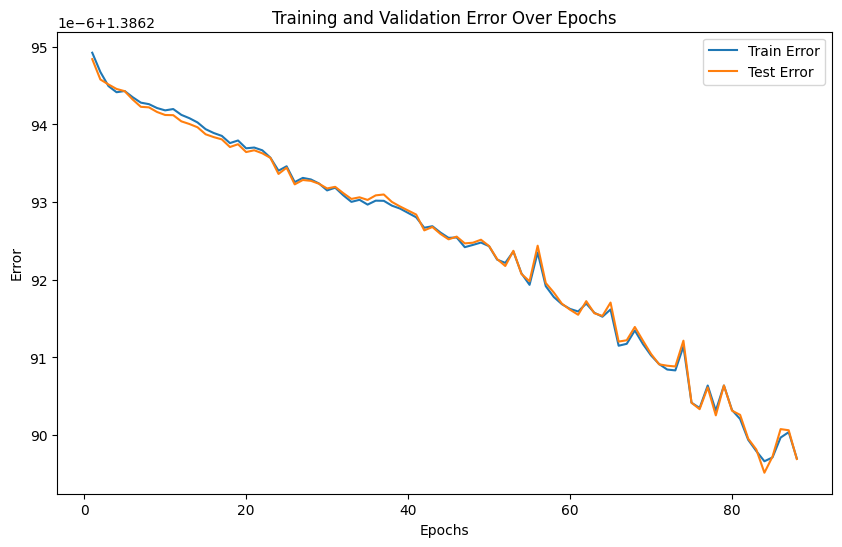

Epoch 1/700: Validation loss = 1.3863
Epoch 2/700: Validation loss = 1.3863
Epoch 3/700: Validation loss = 1.3863
Epoch 4/700: Validation loss = 1.3863
Epoch 5/700: Validation loss = 1.3863
Epoch 6/700: Validation loss = 1.3863
Epoch 7/700: Validation loss = 1.3863
Epoch 8/700: Validation loss = 1.3863
Epoch 9/700: Validation loss = 1.3863
Early stopping at epoch 10


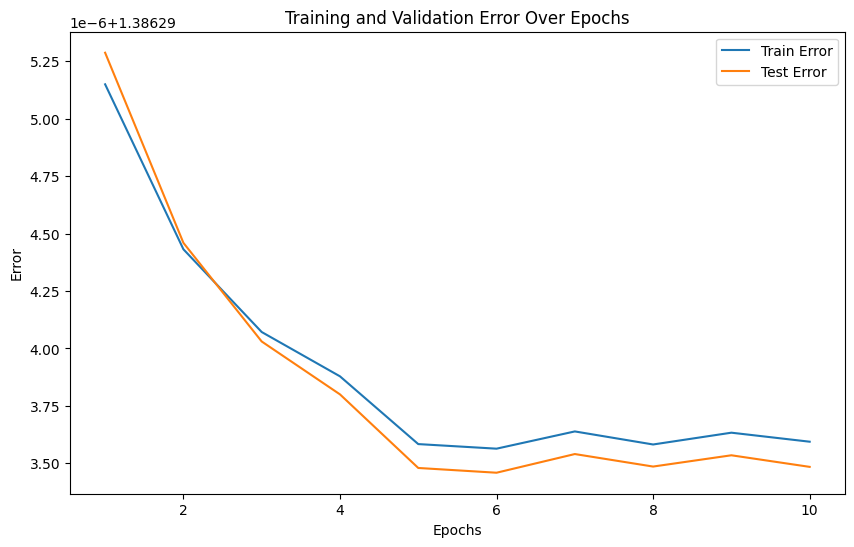

Epoch 1/700: Validation loss = 1.3863
Epoch 2/700: Validation loss = 1.3863
Epoch 3/700: Validation loss = 1.3862
Epoch 4/700: Validation loss = 1.3863
Epoch 5/700: Validation loss = 1.3863
Epoch 6/700: Validation loss = 1.3863
Epoch 7/700: Validation loss = 1.3861
Epoch 8/700: Validation loss = 1.3862
Epoch 9/700: Validation loss = 1.3862
Epoch 10/700: Validation loss = 1.3863
Early stopping at epoch 11


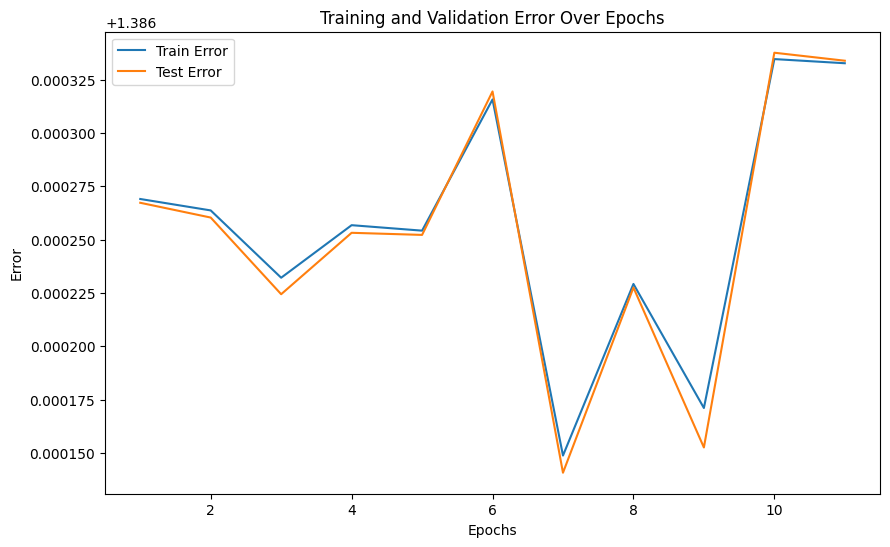

Epoch 1/700: Validation loss = 1.3863
Epoch 2/700: Validation loss = 1.3863
Epoch 3/700: Validation loss = 1.3863
Epoch 4/700: Validation loss = 1.3863
Epoch 5/700: Validation loss = 1.3863
Epoch 6/700: Validation loss = 1.3863
Epoch 7/700: Validation loss = 1.3863
Epoch 8/700: Validation loss = 1.3863
Epoch 9/700: Validation loss = 1.3863
Epoch 10/700: Validation loss = 1.3863
Epoch 11/700: Validation loss = 1.3863
Epoch 12/700: Validation loss = 1.3863
Epoch 13/700: Validation loss = 1.3863
Epoch 14/700: Validation loss = 1.3863
Epoch 15/700: Validation loss = 1.3863
Epoch 16/700: Validation loss = 1.3863
Epoch 17/700: Validation loss = 1.3863
Epoch 18/700: Validation loss = 1.3863
Epoch 19/700: Validation loss = 1.3863
Epoch 20/700: Validation loss = 1.3863
Epoch 21/700: Validation loss = 1.3863
Epoch 22/700: Validation loss = 1.3863
Epoch 23/700: Validation loss = 1.3863
Epoch 24/700: Validation loss = 1.3863
Epoch 25/700: Validation loss = 1.3863
Epoch 26/700: Validation loss = 1.

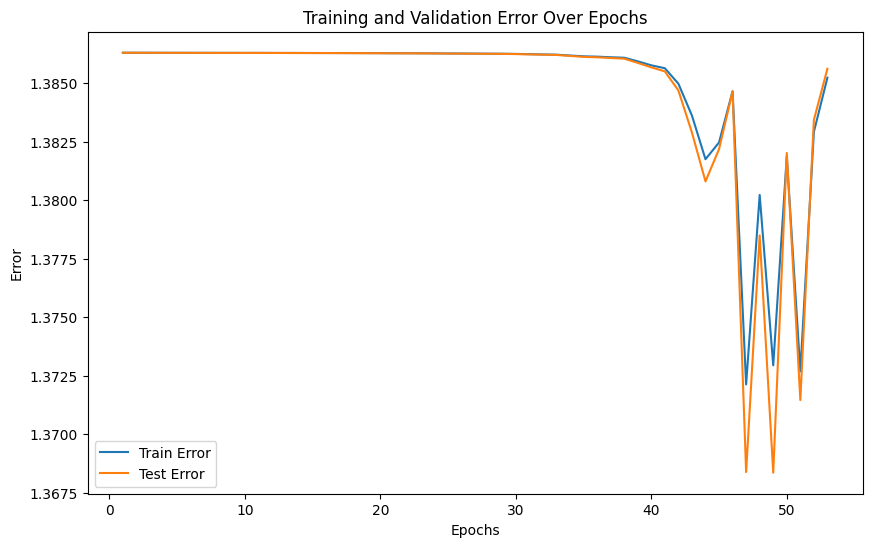

Epoch 1/700: Validation loss = 1.3863
Epoch 2/700: Validation loss = 1.3863
Epoch 3/700: Validation loss = 1.3863
Epoch 4/700: Validation loss = 1.3863
Epoch 5/700: Validation loss = 1.3863
Epoch 6/700: Validation loss = 1.3863
Epoch 7/700: Validation loss = 1.3863
Epoch 8/700: Validation loss = 1.3863
Epoch 9/700: Validation loss = 1.3863
Epoch 10/700: Validation loss = 1.3863
Epoch 11/700: Validation loss = 1.3863
Epoch 12/700: Validation loss = 1.3863
Epoch 13/700: Validation loss = 1.3863
Epoch 14/700: Validation loss = 1.3863
Epoch 15/700: Validation loss = 1.3863
Epoch 16/700: Validation loss = 1.3863
Epoch 17/700: Validation loss = 1.3863
Epoch 18/700: Validation loss = 1.3863
Epoch 19/700: Validation loss = 1.3863
Epoch 20/700: Validation loss = 1.3863
Epoch 21/700: Validation loss = 1.3863
Epoch 22/700: Validation loss = 1.3862
Epoch 23/700: Validation loss = 1.3862
Epoch 24/700: Validation loss = 1.3862
Epoch 25/700: Validation loss = 1.3862
Epoch 26/700: Validation loss = 1.

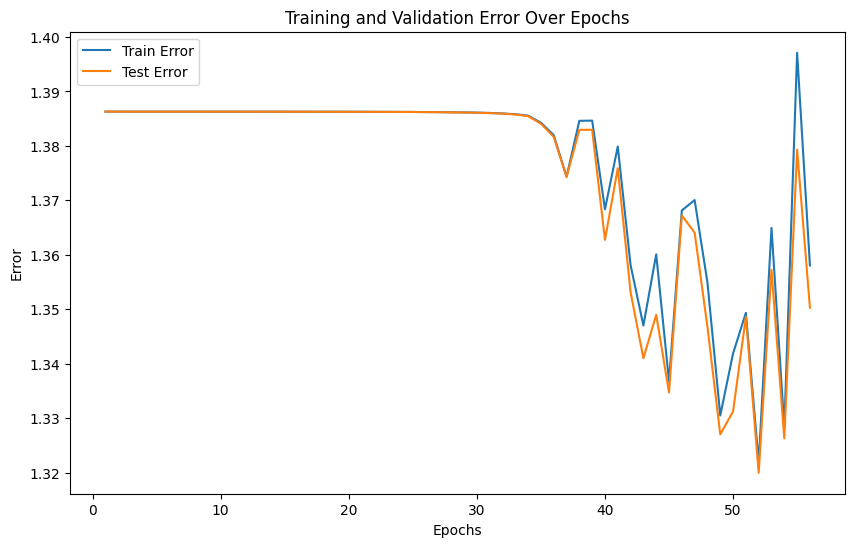

Epoch 1/700: Validation loss = 1.3861
Epoch 2/700: Validation loss = 1.3852
Epoch 3/700: Validation loss = 1.3875
Epoch 4/700: Validation loss = 1.3867
Epoch 5/700: Validation loss = 1.3865
Early stopping at epoch 6


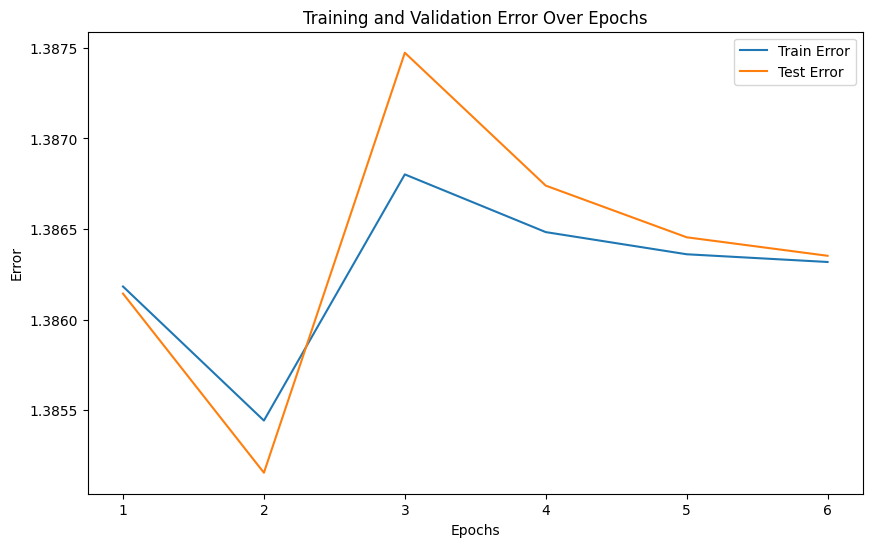

In [97]:
architectures = [(14, 10, 8, 6, 4), (14, 10, 8, 4, 4), (14, 6, 4, 4)]
activations = ["tanh", "relu"]
models = train_models(X_train, y_train, X_val, y_val, architectures, activations, epochs= 700, patience=8)

### 4. Evaluation

In [ ]:
def evaluate_models(models, X_test, y_test):
    """
    Evaluate trained models on the test data.

    Parameters:
    - models (dict): Dictionary containing trained models.
    - X_test (np.array): Test data.
    - y_test (np.array): Test labels.
    
    Returns:
    - dict: Dictionary containing predictions and evaluation metrics for each model.
    """
    results = {}
    
    # Evaluate each model
    for model_name, model in models.items():
        # Predict the test data
        predictions = model.predict(X_test)
        
        # Calculate loss (or other evaluation metrics)
        
        loss = model.calculate_loss(X_test, y_test)

        accuracy = np.mean(predictions == y_test)

        
        # Store results
        results[model_name] = {
            "predictions": predictions,
            "loss": loss,
            "accuracy": accuracy
        }
        
    return results

In [ ]:
results = evaluate_models(models, X_test, y_test)
results

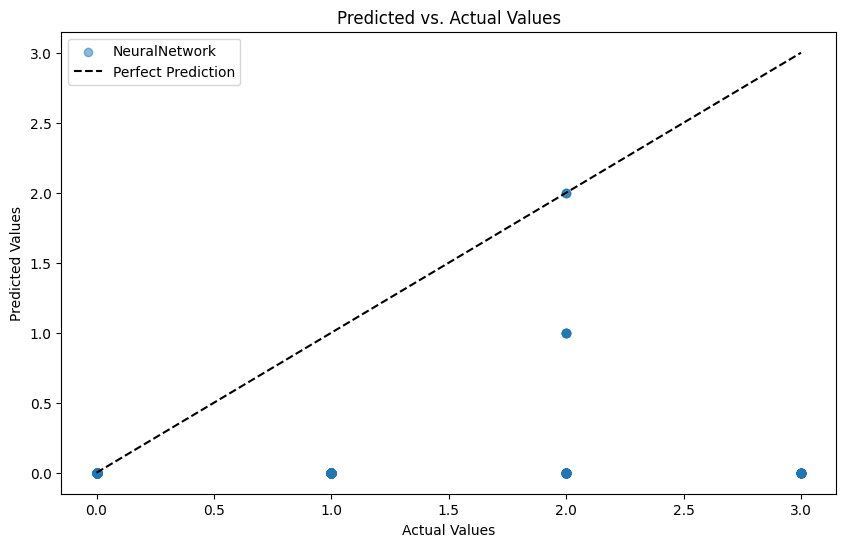

In [39]:
plot_predictions_vs_actual(results, y_test)

In [ ]:
# Spécifiez le nom de la colonne cible
target_attribute = "Class"

# Divisez les données en ensembles d'entraînement, de validation et de test
X_train, y_train, X_val, y_val, X_test, y_test = neural_split_data(data, target_attribute)

# print(np.arange(X_train.shape[0]))
# indices = np.arange(X_train.shape[0])
# np.random.shuffle(indices)
# print(indices)
# shuffled = X_train.iloc[indices]
# print(shuffled)
# print(f"X_train shape {X_train.shape}")
# print("X_train", X_train.head())
# print(f"y_train shape {y_train.shape}")
# print(f"y_train  {y_train.head()}")

# print(f"Valeurs uniques dans y_train : {np.unique(y_train)}")

# Liste des architectures à tester
architectures = [(14, 10, 8, 6, 4)]

# Fonction d'activation à tester
activation = 'tanh'  # Utilisez 'tanh' ou 'relu'

neural_network = NeuralNetwork(architecture=architectures[0])
neural_network.train(X_train, y_train, X_val, y_val, learning_rate=0.01, epochs=50, patience=4, batch_size=4)


# # Boucle pour tester chaque architecture
# for architecture in architectures:
#     print(f"Testing architecture: {architecture} with activation: {activation}")

#     # Créez une instance de NeuralNetwork avec l'architecture et l'activation spécifiées
#     neural_network = NeuralNetwork(architecture, activation)

#     # Entraînez le réseau de neurones
#     neural_network.train(X_train, y_train, X_val, y_val, learning_rate=0.01, epochs=50, patience=4, batch_size=4)

#     # Effectuez les prédictions sur le jeu de test
#     predictions = neural_network.predict(X_test)

# #     # Évaluez les prédictions (par exemple, calcul de la précision)
#     accuracy = np.mean(predictions == y_test)
    
# #     # Affichez les résultats de la précision
#     print(f"Accuracy: {accuracy:.4f}\n")

